# Loan provided/granted

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Exploratory Data Analysis

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

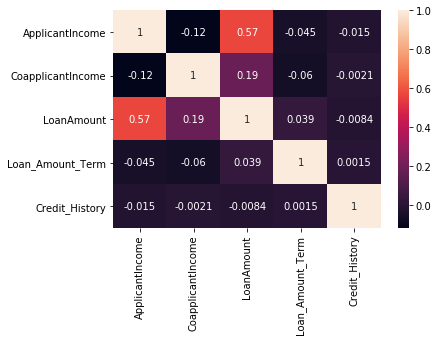

In [7]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [8]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


Handling missing values

In [9]:
df['Gender'].unique

<bound method Series.unique of 0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object>

In [10]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [11]:
df['Gender'].mode()

0    Male
dtype: object

filling missing values

In [12]:
df['Gender'].fillna(df['Gender'].mode()[0] , inplace = True)

In [13]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
df['Married']
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [15]:
df['Married'].describe()

count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object

In [16]:
df['Married'].fillna(df['Married'].mode()[0] , inplace = True)

In [17]:
df['Dependents'].describe()

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

In [18]:
df['Dependents'].fillna(df['Dependents'].mode()[0] , inplace = True)

In [19]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [20]:
df['Self_Employed'].describe()

count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object

In [21]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0] , inplace = True)

In [22]:
df['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [23]:
df['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [24]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0] , inplace = True)

In [25]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [26]:
df['CoapplicantIncome'] = df['CoapplicantIncome'].replace(to_replace = 0 , value =df['CoapplicantIncome'].mean() )

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,1621.245798,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,1621.245798,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,1621.245798,141.0,360.0,1.0,Urban,Y


In [28]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [30]:
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0] , inplace = True)

In [31]:
df['Credit_History'].describe()

count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [32]:
df['Credit_History'].fillna(df['Credit_History'].max() , inplace = True)

In [33]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

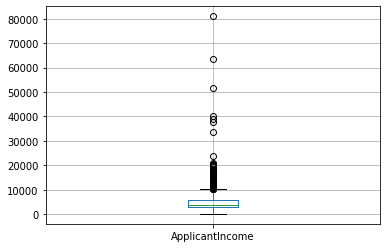

In [34]:
df.boxplot(column = 'ApplicantIncome')

In [35]:
df.shape

(614, 13)

In [36]:
df[df['ApplicantIncome']>50000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,LP001585,Male,Yes,3+,Graduate,No,51763,1621.245798,700.0,300.0,1.0,Urban,Y
333,LP002101,Male,Yes,0,Graduate,No,63337,1621.245798,490.0,180.0,1.0,Urban,Y
409,LP002317,Male,Yes,3+,Graduate,No,81000,1621.245798,360.0,360.0,0.0,Rural,N


In [37]:
df.drop([171,333,409] , inplace = True)

In [38]:
df.reset_index(inplace = True)

In [39]:
df.head(2)

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,1621.245798,120.0,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N


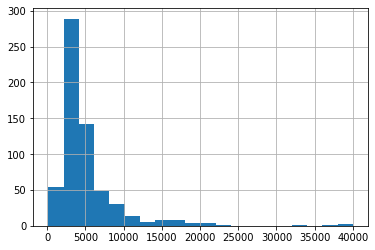

In [40]:
df['ApplicantIncome'].hist(bins=20)

In [41]:
df['ApplicantIncome'].describe()

count      611.000000
mean      5109.040917
std       4361.549063
min        150.000000
25%       2875.500000
50%       3800.000000
75%       5746.000000
max      39999.000000
Name: ApplicantIncome, dtype: float64

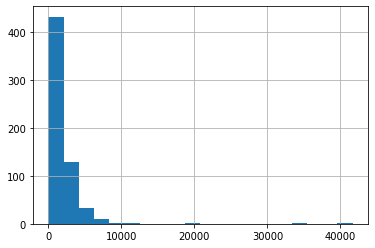

In [42]:
df['CoapplicantIncome'].hist(bins=20)

In [43]:
df.columns

Index(['index', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [44]:
df.describe().columns
           

Index(['index', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

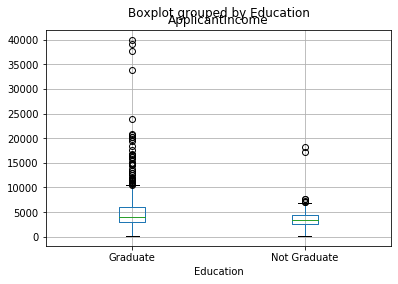

In [45]:
df.boxplot(column = 'ApplicantIncome', by = 'Education')

In [46]:
n_by = df.groupby("Loan_Status")["Credit_History"].count()
n_by.head(10)

Loan_Status
N    191
Y    420
Name: Credit_History, dtype: int64

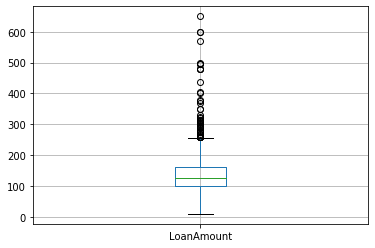

In [47]:
df.boxplot(column = 'LoanAmount')

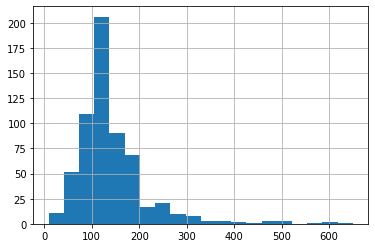

In [48]:
df['LoanAmount'].hist(bins=20)

Normalization (normalize using pandas log function )

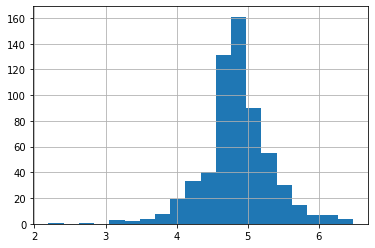

In [49]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins = 20)

In [50]:
df['CoapplicantIncome_log'] = np.log(df['CoapplicantIncome'])
df['ApplicantIncome_log'] = np.log(df['ApplicantIncome'])


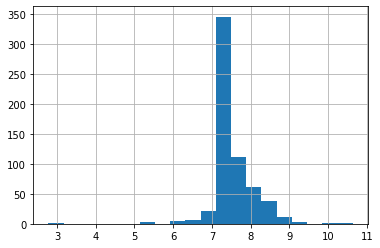

In [51]:
df['CoapplicantIncome_log'].hist(bins = 20)

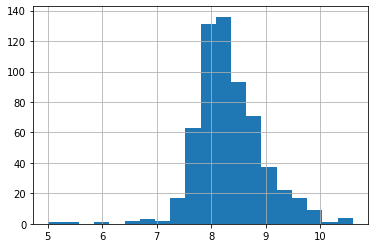

In [52]:
df['ApplicantIncome_log'].hist(bins = 20)

In [53]:
df.isnull().sum()

index                    0
Loan_ID                  0
Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
LoanAmount_log           0
CoapplicantIncome_log    0
ApplicantIncome_log      0
dtype: int64

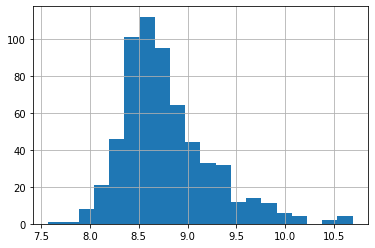

In [54]:
df['TotalIncome'] = df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [55]:
df.head()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,CoapplicantIncome_log,ApplicantIncome_log,TotalIncome,TotalIncome_log
0,0,LP001002,Male,No,0,Graduate,No,5849,1621.245798,120.0,360.0,1.0,Urban,Y,4.787492,7.390950,8.674026,7470.245798,8.918683
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N,4.852030,7.318540,8.430109,6091.000000,8.714568
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,1621.245798,66.0,360.0,1.0,Urban,Y,4.189655,7.390950,8.006368,4621.245798,8.438420
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y,4.787492,7.765569,7.856707,4941.000000,8.505323
4,4,LP001008,Male,No,0,Graduate,No,6000,1621.245798,141.0,360.0,1.0,Urban,Y,4.948760,7.390950,8.699515,7621.245798,8.938695


In [56]:
df.columns

Index(['index', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'CoapplicantIncome_log', 'ApplicantIncome_log',
       'TotalIncome', 'TotalIncome_log'],
      dtype='object')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  611 non-null    int64  
 1   Loan_ID                611 non-null    object 
 2   Gender                 611 non-null    object 
 3   Married                611 non-null    object 
 4   Dependents             611 non-null    object 
 5   Education              611 non-null    object 
 6   Self_Employed          611 non-null    object 
 7   ApplicantIncome        611 non-null    int64  
 8   CoapplicantIncome      611 non-null    float64
 9   LoanAmount             611 non-null    float64
 10  Loan_Amount_Term       611 non-null    float64
 11  Credit_History         611 non-null    float64
 12  Property_Area          611 non-null    object 
 13  Loan_Status            611 non-null    object 
 14  LoanAmount_log         611 non-null    float64
 15  Coappl

In [58]:
df = df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'CoapplicantIncome_log', 'ApplicantIncome_log',
        'TotalIncome_log']]

preprocessing_LabelEncoder

In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_col = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed',  'Property_Area', 'Loan_Status']

for each_col in cat_col:
    
    df[each_col] = le.fit_transform(df[each_col])

In [60]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,CoapplicantIncome_log,ApplicantIncome_log,TotalIncome_log
0,1,0,0,0,0,360.0,1.0,2,1,4.787492,7.39095,8.674026,8.918683


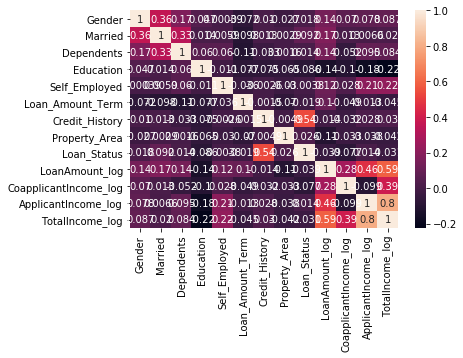

In [61]:
sns.heatmap(df.corr(),annot= True)
plt.rcParams["figure.figsize"] = (20,10)

In [62]:
df.corr().transpose()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,CoapplicantIncome_log,ApplicantIncome_log,TotalIncome_log
Gender,1.000000,0.363552,0.171604,0.046647,0.000386,-0.072227,0.010470,-0.026742,0.018146,0.139200,0.070145,0.078276,0.087456
Married,0.363552,1.000000,0.333071,0.014223,0.005904,-0.098122,0.012936,0.002926,0.091990,0.173235,0.013255,0.006579,0.020482
Dependents,0.171604,0.333071,1.000000,0.059536,0.059736,-0.106984,-0.032752,0.001581,0.014029,0.143886,-0.052058,0.094904,0.083676
Education,0.046647,0.014223,0.059536,1.000000,-0.011414,-0.076928,-0.075482,-0.064561,-0.086277,-0.142717,-0.100746,-0.178940,-0.224779
Self_Employed,0.000386,0.005904,0.059736,-0.011414,1.000000,-0.035823,-0.002596,-0.030264,-0.003797,0.117174,0.028246,0.207439,0.223155
Loan_Amount_Term,-0.072227,-0.098122,-0.106984,-0.076928,-0.035823,1.000000,-0.001519,-0.069847,-0.018546,0.102071,-0.049032,-0.012841,-0.044946
Credit_History,0.010470,0.012936,-0.032752,-0.075482,-0.002596,-0.001519,1.000000,-0.004932,0.537884,-0.014241,-0.032295,0.027635,0.029901
Property_Area,-0.026742,0.002926,0.001581,-0.064561,-0.030264,-0.069847,-0.004932,1.000000,0.026410,-0.106558,-0.033159,-0.037658,-0.041696
Loan_Status,0.018146,0.091990,0.014029,-0.086277,-0.003797,-0.018546,0.537884,0.026410,1.000000,-0.038642,-0.077176,0.013820,-0.030986
LoanAmount_log,0.139200,0.173235,0.143886,-0.142717,0.117174,0.102071,-0.014241,-0.106558,-0.038642,1.000000,0.276811,0.464485,0.593118


independent and denpendent variable(Target)

In [63]:
x = df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'CoapplicantIncome_log', 'ApplicantIncome_log',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 
       'LoanAmount_log',  'TotalIncome_log']].values
y = df[['Loan_Status']].values

In [64]:
x

array([[1.        , 0.        , 0.        , ..., 2.        , 4.78749174,
        8.91868318],
       [1.        , 1.        , 1.        , ..., 0.        , 4.85203026,
        8.71456755],
       [1.        , 1.        , 0.        , ..., 2.        , 4.18965474,
        8.4384196 ],
       ...,
       [1.        , 1.        , 1.        , ..., 2.        , 5.53338949,
        9.02545553],
       [1.        , 1.        , 2.        , ..., 2.        , 5.23110862,
        9.12742016],
       [0.        , 0.        , 0.        , ..., 1.        , 4.89034913,
        8.73298914]])

In [65]:
y

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
    

model_selection

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2 , random_state= 0)

In [67]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((488, 12), (123, 12), (488, 1), (123, 1))

StandardScaler

In [68]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

# Classification algorithm


## Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression( random_state=0)
lr.fit(X_train, Y_train)

f:\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [71]:
from sklearn import metrics
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred, Y_test))

The accuracy of Logistic Regression is:  0.8373983739837398


# Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB
NBc = GaussianNB()
NBc.fit(X_train, Y_train)

f:\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [73]:
y_pred = NBc.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [74]:
print('The accuracy of Naive Bayes is: ', metrics.accuracy_score(y_pred, Y_test))

The accuracy of Naive Bayes is:  0.8292682926829268


# KNeighborsClassifier

In [75]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

f:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [76]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [77]:
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred, Y_test))

The accuracy of KNN is:  0.8211382113821138


# Ensembling

Max Voting

In [78]:
from sklearn.ensemble import VotingClassifier
lr = LogisticRegression( random_state=0)
NBc = GaussianNB()
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model = VotingClassifier(estimators=[('lr', lr), ('NBc', NBc), ('classifier', classifier)], voting='hard')
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

f:\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
f:\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8292682926829268

# Test data

In [79]:
testdata = pd.read_csv("test.csv")

In [80]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [81]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


missing values

In [82]:
testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [83]:
testdata.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

Handling missing values

In [84]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0] , inplace = True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0] , inplace = True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0] , inplace = True)
testdata['LoanAmount'].fillna(testdata['LoanAmount'].mode()[0]  , inplace = True)
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0]  , inplace = True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0]  , inplace = True)

In [85]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [86]:
testdata.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,136.321526,342.822888,0.839237
std,4910.685399,2334.232099,60.967295,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


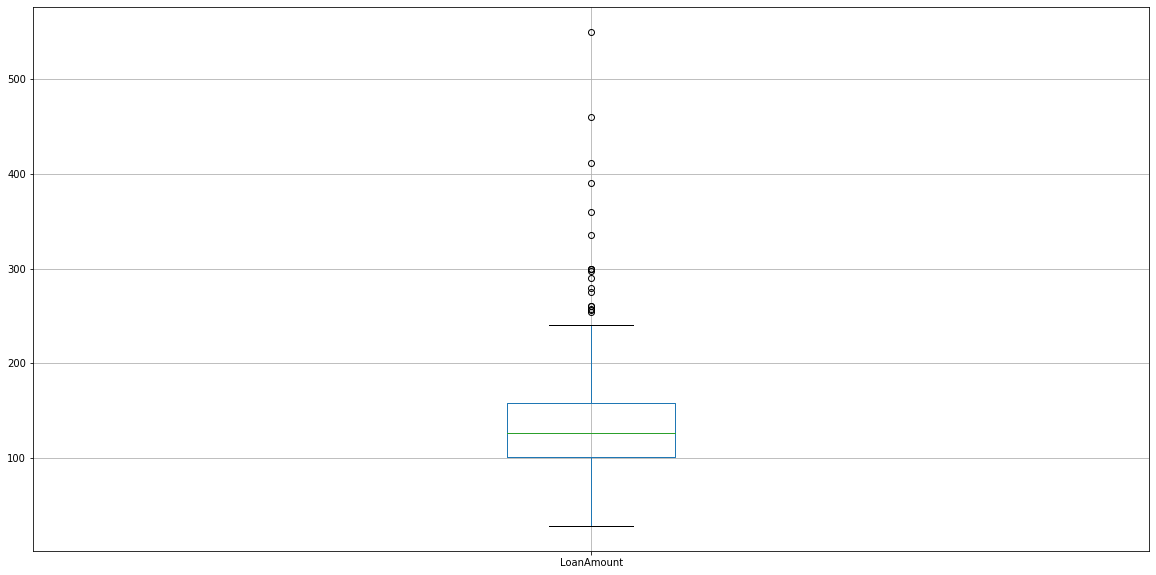

In [87]:
testdata.boxplot(column = 'LoanAmount')


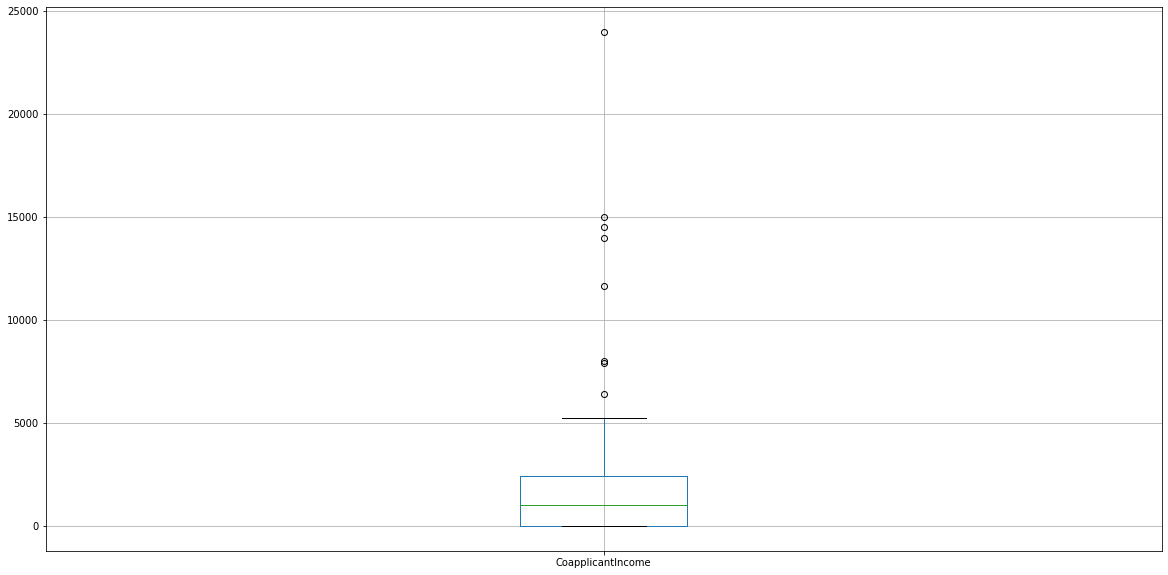

In [88]:
testdata.boxplot(column = 'CoapplicantIncome')

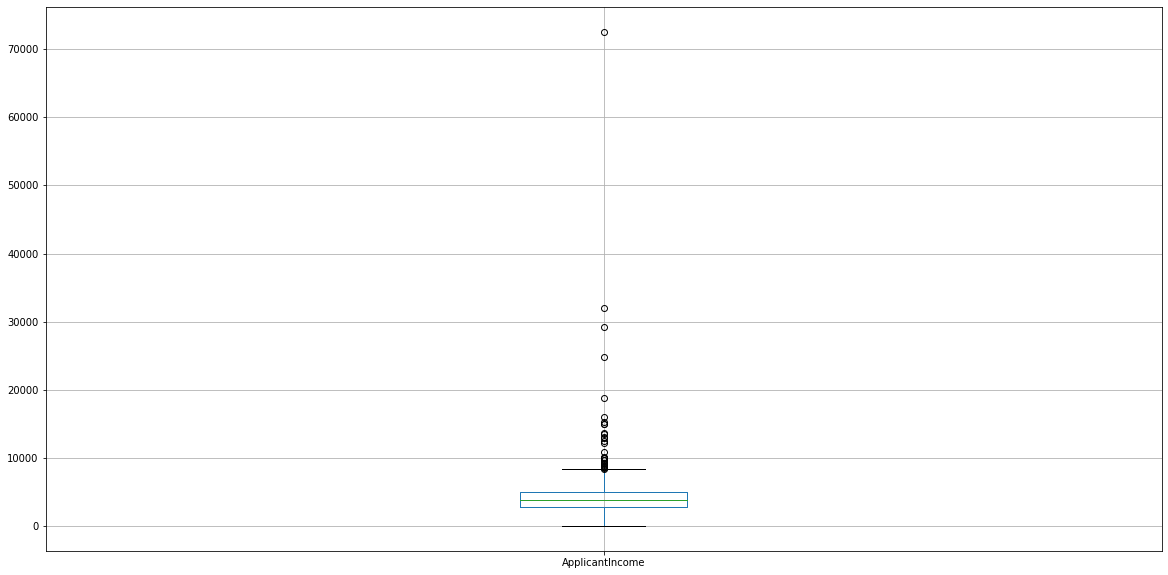

In [89]:
testdata.boxplot(column = 'ApplicantIncome')

In [90]:
testdata['LoanAmount_log'] = np.log(testdata['LoanAmount'])

In [91]:
testdata['TotalIncome'] = testdata['ApplicantIncome']+testdata['CoapplicantIncome']
testdata['TotalIncome_log'] = np.log(testdata['TotalIncome'])

In [92]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [93]:
testdata.shape

(367, 15)

In [94]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_col1 = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed',  'Property_Area']

for each_col in cat_col1:
    
    testdata[each_col] = le.fit_transform(testdata[each_col])

In [95]:
testdata.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'LoanAmount_log',
       'TotalIncome', 'TotalIncome_log'],
      dtype='object')

In [96]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,4.700480,5720,8.651724
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,4.836282,4576,8.428581
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,5.337538,6800,8.824678
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,4.605170,4886,8.494129
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,4.356709,3276,8.094378


In [97]:
testdata.shape

(367, 15)

In [98]:
test = testdata.iloc[:,np.r_[1:5,9:11,13:15]].values

In [99]:
test = testdata[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'TotalIncome', 'TotalIncome_log']].values

##test=pred
print('The accuracy : ', metrics.accuracy_score(pred,y_pred))

In [102]:
test = ss.fit_transform(test)

In [117]:
test.shape,y.shape

((367, 10), (611, 1))

In [115]:
pred = NBc.predict(test)
pred

ValueError: operands could not be broadcast together with shapes (367,10) (12,) 

from sklearn.naive_bayes import GaussianNB
NBc = GaussianNB()
NBc.fit(X_train, Y_train)

In [104]:
NBc.fit(X_train, Y_train)

f:\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [114]:
pred = NBc.predict(y)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

from sklearn.metrics import accuracy_score
accuracy_score(pred, labels_test)

# Regression model

Linear Regression

In [146]:
df1 = df.copy()

In [147]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,CoapplicantIncome_log,ApplicantIncome_log,TotalIncome_log
0,1,0,0,0,0,360.0,1.0,2,1,4.787492,7.390950,8.674026,8.918683
1,1,1,1,0,0,360.0,1.0,0,0,4.852030,7.318540,8.430109,8.714568
2,1,1,0,0,1,360.0,1.0,2,1,4.189655,7.390950,8.006368,8.438420
3,1,1,0,1,0,360.0,1.0,2,1,4.787492,7.765569,7.856707,8.505323
4,1,0,0,0,0,360.0,1.0,2,1,4.948760,7.390950,8.699515,8.938695


In [148]:
df1.shape

(611, 13)

In [149]:
df1.isnull().sum()

Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
LoanAmount_log           0
CoapplicantIncome_log    0
ApplicantIncome_log      0
TotalIncome_log          0
dtype: int64

In [150]:
df1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'CoapplicantIncome_log', 'ApplicantIncome_log',
       'TotalIncome_log'],
      dtype='object')

In [151]:
df1['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
606    1
607    1
608    1
609    1
610    0
Name: Loan_Status, Length: 611, dtype: int32

In [152]:
df1['Loan_Status'].value_counts()

1    420
0    191
Name: Loan_Status, dtype: int64

In [153]:
df1 = df1[df1['Loan_Status']==1]

In [154]:
df1.shape

(420, 13)

In [155]:
df1.reset_index(inplace = True)

In [156]:
df1.columns

Index(['index', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'LoanAmount_log', 'CoapplicantIncome_log',
       'ApplicantIncome_log', 'TotalIncome_log'],
      dtype='object')

In [198]:
df1['LoanAmount'] = np.exp(df1['LoanAmount_log'])

In [199]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount_log,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,TotalIncome_log,LoanAmount
0,1,0,0,0,0,4.787492,360.0,1.0,2,1,8.674026,7.390950,8.918683,120.0
1,1,1,0,0,1,4.189655,360.0,1.0,2,1,8.006368,7.390950,8.438420,66.0
2,1,1,0,1,0,4.787492,360.0,1.0,2,1,7.856707,7.765569,8.505323,120.0
3,1,0,0,0,0,4.948760,360.0,1.0,2,1,8.699515,7.390950,8.938695,141.0
4,1,1,2,0,1,5.587249,360.0,1.0,2,1,8.597297,8.341887,9.170872,267.0


In [161]:
df1.shape

(420, 13)

In [160]:
df1 = df1[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount_log',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'ApplicantIncome_log', 'CoapplicantIncome_log', 
       'TotalIncome_log']]

In [187]:
x = df1[[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status',  'CoapplicantIncome_log',
       'ApplicantIncome_log', 'TotalIncome_log']].values
y = df1[['LoanAmount']].values

In [188]:
x.shape

(420, 12)

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size = 0.7, test_size=0.3)

In [191]:
x.reshape(-1,1)

array([[1.        ],
       [0.        ],
       [0.        ],
       ...,
       [7.39095014],
       [8.93366418],
       [9.12742016]])

In [192]:
y.reshape(-1,1)

array([[120.],
       [ 66.],
       [120.],
       [141.],
       [267.],
       [ 95.],
       [168.],
       [ 70.],
       [109.],
       [200.],
       [ 17.],
       [125.],
       [100.],
       [115.],
       [315.],
       [191.],
       [122.],
       [110.],
       [120.],
       [114.],
       [120.],
       [144.],
       [184.],
       [110.],
       [ 47.],
       [ 75.],
       [134.],
       [ 96.],
       [ 88.],
       [ 44.],
       [144.],
       [144.],
       [100.],
       [120.],
       [ 97.],
       [ 96.],
       [180.],
       [144.],
       [120.],
       [ 99.],
       [312.],
       [125.],
       [172.],
       [ 97.],
       [ 81.],
       [187.],
       [130.],
       [111.],
       [120.],
       [ 50.],
       [136.],
       [ 99.],
       [104.],
       [210.],
       [175.],
       [131.],
       [188.],
       [ 81.],
       [122.],
       [ 25.],
       [137.],
       [ 50.],
       [115.],
       [131.],
       [133.],
       [151.],
       [12

In [193]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [194]:
X_train.shape , X_test.shape, Y_train.shape, Y_test.shape

((294, 12), (126, 12), (294, 1), (126, 1))

In [195]:
lr.intercept_

array([-871.61527871])

In [196]:
lr.coef_

array([[-9.37209292e+00,  2.65422909e+01,  2.42667463e+00,
        -6.09404019e+00,  5.73209610e+00,  2.11438684e-01,
         1.25831646e+01,  1.64273108e-01,  4.97379915e-14,
        -1.01885086e+01, -9.72497728e+00,  1.22342695e+02]])

In [197]:
y_pred= lr.predict(x)
y_pred

array([[139.52053498],
       [119.53114418],
       [113.52879169],
       [141.72097245],
       [198.55924064],
       [ 88.46379509],
       [138.46460863],
       [105.82172356],
       [111.45400899],
       [210.09530141],
       [ -0.79587434],
       [125.45614248],
       [ 71.29530728],
       [141.31527252],
       [209.26917681],
       [216.19463292],
       [121.85965941],
       [129.72837052],
       [125.08406604],
       [125.50897083],
       [106.38893827],
       [134.81098239],
       [179.07095424],
       [ 97.95885758],
       [ 42.85078941],
       [ 98.95460139],
       [144.72502015],
       [147.3087074 ],
       [105.78261388],
       [165.50774168],
       [165.65006569],
       [127.64091093],
       [ 89.56254789],
       [ 98.44555063],
       [101.28670827],
       [ 90.70574899],
       [201.66227013],
       [141.95521364],
       [144.73871814],
       [121.75086136],
       [224.28594254],
       [126.60719788],
       [144.06148042],
       [ 95